In [18]:
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import pandas as pd
from numpy import *

plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.color'] = 'black'
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 19
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.borderpad'] = .5
plt.rcParams['legend.columnspacing'] = .5

In [253]:
policies = ['TBGRD', 'EWMAGRAD', 'LMIN', 'LFU', 'LRU', 'FIFO', 'RR']
prettyname = ['TBGRD', 'GRD', 'PGA', 'LFU', 'LRU', 'FIFO', 'RR']
prettifier = pd.DataFrame(policies)
prettifier.columns = ['cache']
prettifier['translate'] = prettyname
prettifier.set_index('cache', inplace=True)
prettifier.loc['LMIN'].values[0]
ordering = pd.DataFrame(policies)
ordering.columns = ['cache']
ordering['c'] = flip(arange(len(policies)))
ordering.set_index('cache', inplace=True)

### Bar plots

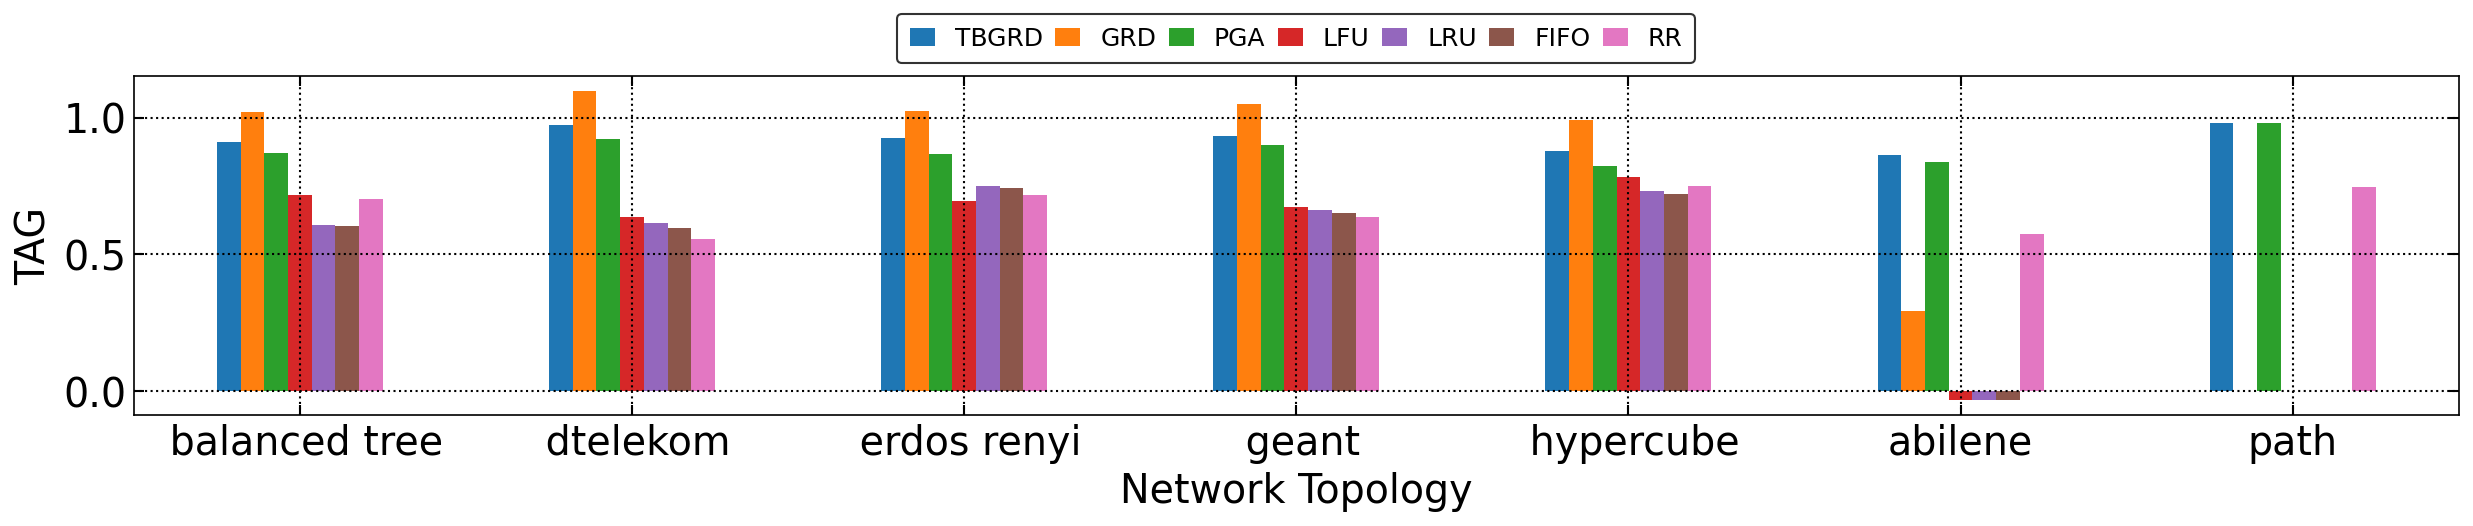

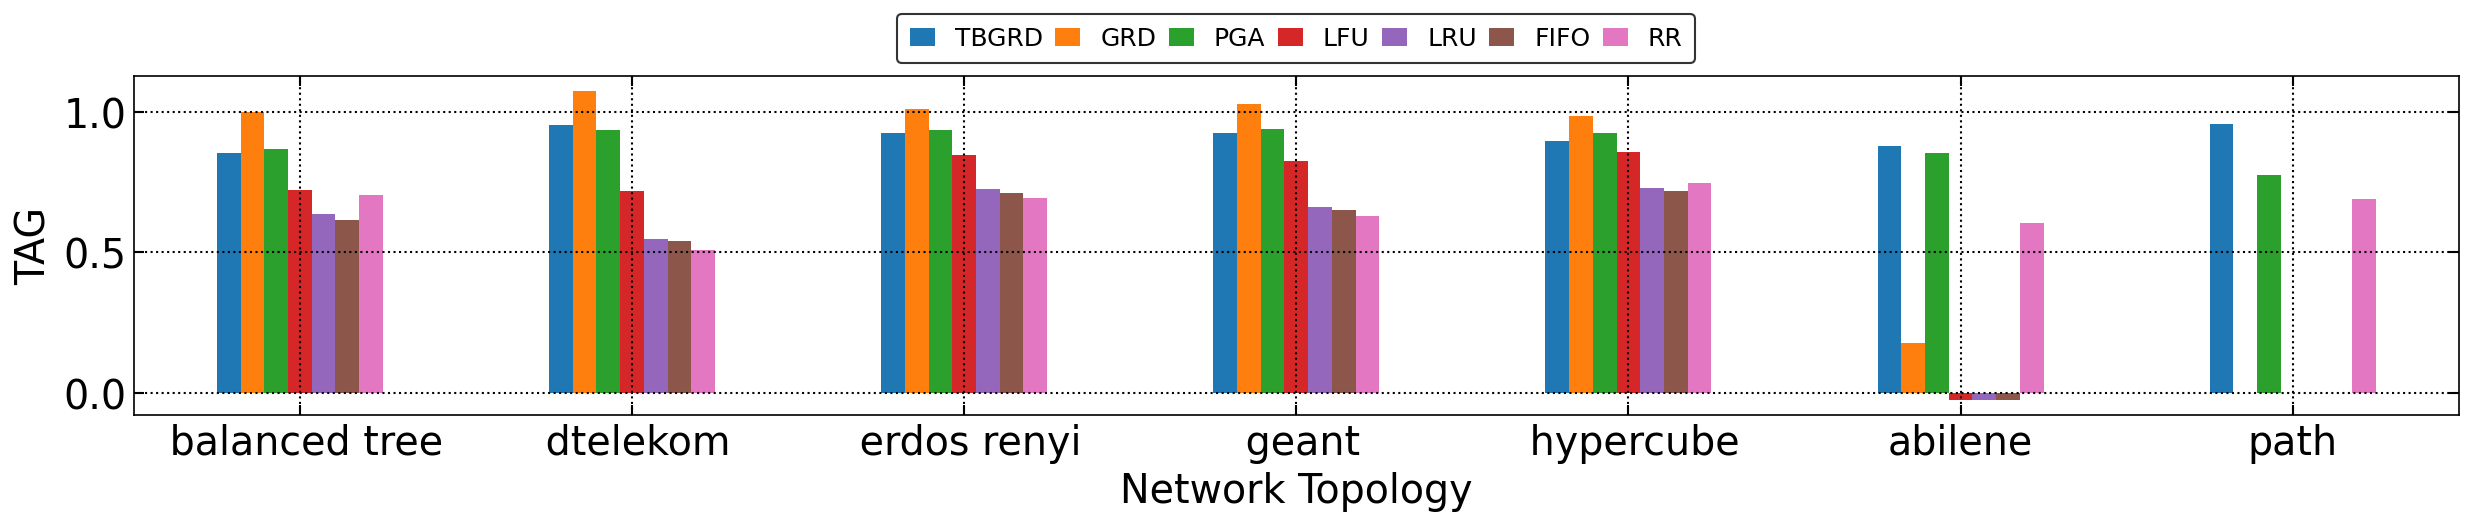

In [308]:
dfs = []

for prefix in ['changing', 'stationary']:
    for filename in os.listdir('res/{}/'.format(prefix)):
        filename = 'res/{}/'.format(prefix) + filename
        data = pd.read_pickle(filename)
        args, construct_stats, optimal_stats, demand_stats, node_stats, network_stats = data
        OPT = optimal_stats['L']
        cache_type = args.cache_type
        graph_type = args.graph_type
        # print(OPT, cache_type, graph_type)
        times2 = array(sorted(network_stats['demand'].keys())[1:])
        tags = array([network_stats['fun'][x][3] - network_stats['demand'][x]['weight'] for x in times2]) / OPT
        # print(OPT, tags[-1]*OPT)
        df = pd.DataFrame(array([times2[:len(tags)], tags[:len(tags)]]).T, columns=['time', 'TAG'])
        df['cache'] = prettifier.loc[cache_type].values[0]
        df['graph'] = graph_type.replace('_', ' ')
        df['ordering'] = str(int(ordering.loc[cache_type]))
        if not (graph_type.replace('_', ' ') == 'abilene' or graph_type.replace('_', ' ') == 'path'):
            df['graph'] = ' ' + df['graph']

        if cache_type == 'EWMAGRAD':
            df['param'] = args.beta
        elif cache_type == 'LMIN':
            df['param'] = args.gamma
        elif cache_type == 'TBGRD':
            df['param'] = str((args.action_selector_eta, args.frequency))
        else:
            df['param'] = -1
        dfs.append(df)
    df = pd.concat(dfs)
    # color_cycle = hv.Cycle(['r', 'sandybrown', 'gold', 'darkseagreen', 'c', 'dodgerblue', 'm'])

    data = df.groupby(['graph', 'ordering', 'cache', 'param']).TAG.apply(
        lambda df: df.iloc[df.shape[0] - 1]).reset_index().groupby(['graph', 'ordering', 'cache']).TAG.max()
    data = data.reset_index()
    #%%
    fig, ax = plt.subplots(figsize=(20, 3))
    data.pivot('graph', 'cache', 'TAG').iloc[:, [6, 1, 4, 2, 3, 0, 5]].plot(kind='bar', ax=ax, rot=0);
    plt.grid(True)
    ax.set(xlabel='Network Topology', ylabel='TAG')
    legend = ax.legend(loc='lower center', bbox_to_anchor=(.5, 1), ncol=10)
    fig.savefig('figs/{}_pop_bars.pdf'.format(prefix))

### Update cost plots

#### Vanilla Hedge

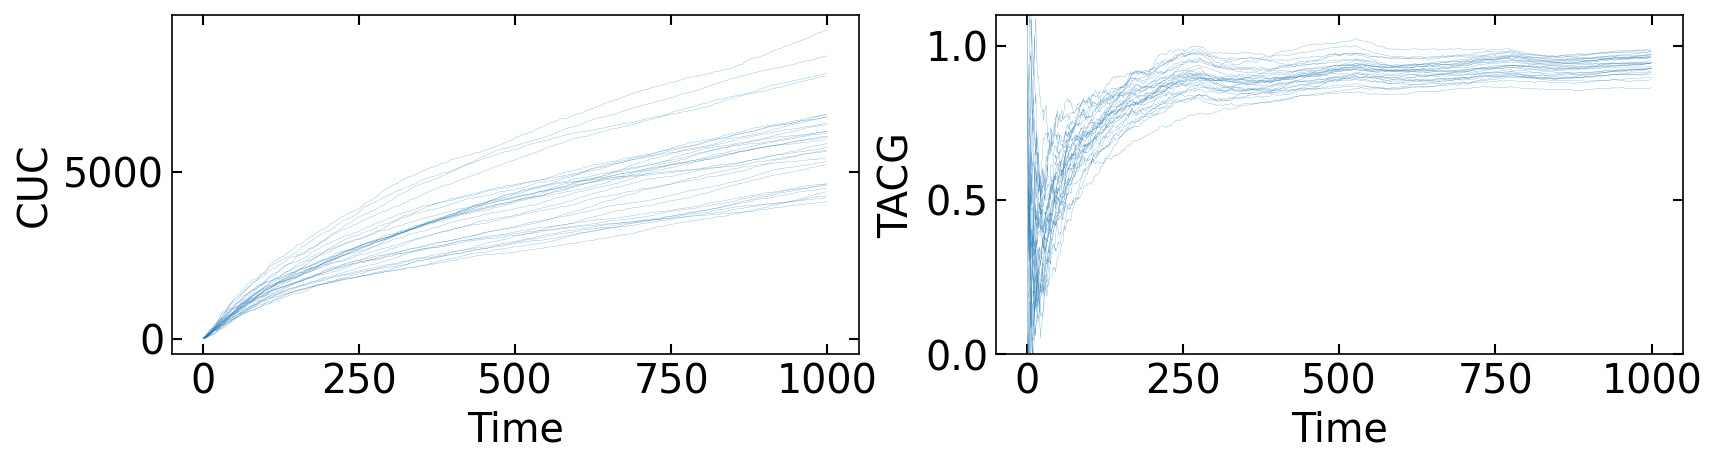

In [301]:
prefix = 'uc_uncorr'
import numpy as np
fig, axs = plt.subplots(1,2,figsize=(13, 3))

for exp, filename in enumerate(os.listdir('res/{}/'.format(prefix))):
    filename = 'res/{}/'.format(prefix) + filename
    data = pd.read_pickle(filename)
    args, construct_stats, optimal_stats, demand_stats, node_stats, network_stats = data
    OPT = optimal_stats['L']
    cache_type = args.cache_type
    graph_type = args.graph_type
    # print(OPT, cache_type, graph_type)
    times2 = array(sorted(network_stats['demand'].keys())[1:])
    tags = array([network_stats['fun'][x][3] - network_stats['demand'][x]['weight'] for x in times2]) / OPT
    ucs = array([network_stats['fun'][x][5] for x in times2])
    axs[0].plot(times2, ucs, linewidth=0.1, color='C0')
    axs[0].set(xlabel='Time', ylabel='CUC')
    axs[1].plot(times2, tags, linewidth=0.1, color='C0')
    axs[1].set(ylim=(0,1.1))
    axs[1].set(xlabel='Time', ylabel='TACG')

#### Coupled Hedge

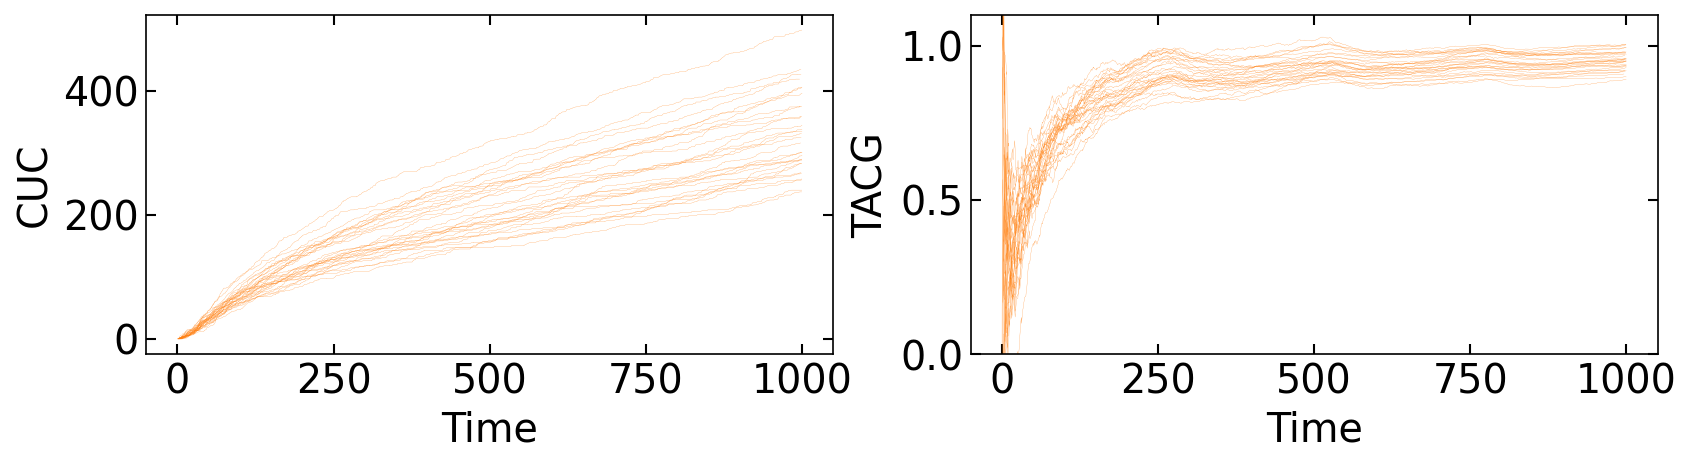

In [302]:
prefix = 'uc_corr'
import numpy as np
fig, axs = plt.subplots(1,2,figsize=(13, 3))

for exp, filename in enumerate(os.listdir('res/{}/'.format(prefix))):
    filename = 'res/{}/'.format(prefix) + filename
    data = pd.read_pickle(filename)
    args, construct_stats, optimal_stats, demand_stats, node_stats, network_stats = data
    OPT = optimal_stats['L']
    cache_type = args.cache_type
    graph_type = args.graph_type
    # print(OPT, cache_type, graph_type)
    times2 = array(sorted(network_stats['demand'].keys())[1:])
    tags = array([network_stats['fun'][x][3] - network_stats['demand'][x]['weight'] for x in times2]) / OPT
    ucs = array([network_stats['fun'][x][5] for x in times2])
    axs[0].plot(times2, ucs, linewidth=0.1, color='C1')
    axs[0].set(xlabel='Time', ylabel='CUC')
    axs[1].plot(times2, tags, linewidth=0.1, color='C1')
    axs[1].set(ylim=(0,1.1))
    axs[1].set(xlabel='Time', ylabel='TACG')